    
<center><h1>HR Analytics</h1></center>
    
<h2>Probelm Statement</h2><br>
To Identifying the right people for promotion (only for manager position and below).
    
<h2>Dataset Description</h2>
<img src="./MarkDown/dataset_description.png"/>
    
<h2>Existing Approach</h2>
    <ol>
        <li>They first identify a set of employees based on recommendations/ past performance</li>
        <li>Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical</li>
        <li>At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion</li>
    </ol>





## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
hr_data=pd.read_csv('dataset.csv')
total_samples = hr_data.shape[0]

In [2]:
hr_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
0,3647,Sales & Marketing,region_9,Master's & above,m,sourcing,1,27,1.0,1,0,0,48,0
1,4458,Technology,region_22,Bachelor's,f,sourcing,1,30,1.0,1,0,0,81,0
2,7856,Procurement,region_13,Bachelor's,m,other,2,27,1.0,1,0,0,71,0
3,8903,Sales & Marketing,region_1,Master's & above,f,other,1,31,1.0,1,0,0,51,0
4,9897,Finance,region_10,Bachelor's,m,sourcing,2,30,1.0,1,0,0,59,0


In [3]:
hr_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
#hr_data.info()
#Data Cleaning

#No of NaN values present in the each coloumns
hr_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

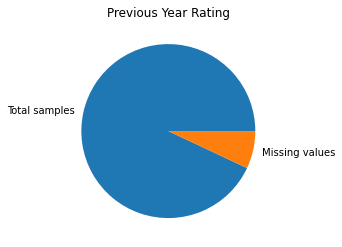

In [5]:
null_values_count = hr_data.isna().sum()
pie_plot_array = np.array([hr_data.shape[0],null_values_count['previous_year_rating']])
mylabels = ["Total samples", "Missing values"]

plt.pie(pie_plot_array,labels = mylabels)
plt.title("Previous Year Rating")
plt.show()


<h2>Observations</h2><br>
    <ol>
        <li>For 4214 entries previous year rating is NaN.So assuming they are new joiners to the organisation and replacing NaN values with 0</li>
        <li>Education is not used to determine the promotion.Drop the coloumn.</li>
    </ol>


In [8]:
#Replacing the NaN values in the previous_rating_coloumn with 0.
hr_data['previous_year_rating'].fillna(0,inplace = True)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x12083f8da00>,
 'caps': [<matplotlib.lines.Line2D at 0x12083f9f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x12083f8d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x12083f9f7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12083f9fb20>],
 'means': []}

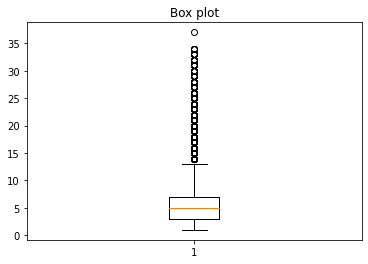

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot')
ax1.boxplot(hr_data['length_of_service'])